In [1]:
import numpy as np
import pandas as pd

from tabulate import tabulate

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
inp0= pd.read_csv("./googleplaystore.csv")

In [3]:
print(inp0.keys())

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [4]:
inp0.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
inp0.dropna(how ='any', inplace = True)

In [6]:
inp0.isnull().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
inp0.Price.value_counts()[:5]

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: Price, dtype: int64

In [8]:
#Modifying the column
inp0['Price'] = inp0.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

In [9]:
#Converting reviews to numeric
inp0.Reviews = inp0.Reviews.astype("int32")

In [10]:
inp0.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [11]:
#Handling the installs column
inp0.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [12]:
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

In [13]:
inp0.Installs = inp0.Installs.map(clean_installs)

In [14]:
inp0.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [15]:
#Handling the app size field
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

In [16]:
inp0["Size"] = inp0["Size"].map(change_size)

In [17]:
inp0.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [18]:
inp0.Size.fillna(method = 'ffill', inplace = True)

In [19]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [20]:
inp0 = inp0[inp0.Reviews <= inp0.Installs].copy()

In [21]:
inp0.shape

(9353, 13)

In [22]:
inp0 = inp0[inp0.Price <= 200].copy()
inp0.shape

(9338, 13)

In [23]:
inp0 = inp0[inp0.Reviews <= 2000000]
inp0.shape

(8885, 13)

In [24]:
len(inp0[inp0.Installs >= 1000000000])

6

In [25]:
inp0 = inp0[inp0.Installs < 1000000000].copy()
inp0.shape

(8879, 13)

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
inp1 = inp0.copy()

In [28]:
inp0.Installs.describe()

count    8.879000e+03
mean     5.595862e+06
std      2.421042e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      5.000000e+08
Name: Installs, dtype: float64

In [29]:
inp1.Installs = inp1.Installs.apply(np.log1p)

In [30]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)

In [31]:
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
inp1.shape

(8879, 9)

In [32]:
inp2 = pd.get_dummies(inp1, drop_first=True)

In [33]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [36]:
df_train.shape, df_test.shape

((6215, 157), (2664, 157))

In [37]:
y_train = df_train.pop("Rating")
x_train = df_train

In [38]:
x_train.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
1279,7.63627,6900.0,11.512935,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y_test = df_test.pop("Rating")
x_test = df_test

In [40]:
x_test.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
1161,9.329456,24000.0,13.815512,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
import statsmodels.api as sm

In [42]:
#Applying linear regression
model1 = sm.OLS(y_train, x_train)

In [43]:
model1 = model1.fit()

In [44]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3717.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):                        0.00
Time:                        12:15:22   Log-Likelihood:                         -4281.7
No. Observations:                6215   AIC:                                      8811.
Df Residuals:                    6091   BIC:                                      9646.
Df Model:                         124                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1752      0.006     28.037      0.000       0.163       0.187
Size                                         -2.896e-07   3.37e-07     -0.859      0.391   -9.51e-07    3.72e-07
Installs                                        -0.1499      0.006    -24.184      0.000      -0.162      -0.138
Price                                            0.0006      0.003      0.177      0.860      -0.006       0.007
Category_AUTO_AND_VEHICLES                       1.6381      0.125     13.136      0.000       1.394       1.883
Category_BEAUTY                                  1.7213      0.128     13.462      0.000       1.471       1.972
Category_BOOKS_AND_REFERENCE                     1.6843      0.122     13.826      0.000       1.445       1.923
Category_BUSINESS                                1.6046      0.121     13.272      0.000       1.368       1.842
Category_COMICS                                  2.3786      0.226     10.517      0.000       1.935       2.822
Category_COMMUNICATION                           1.5478      0.121     12.765      0.000       1.310       1.786
Category_DATING                                  1.5013      0.122     12.262      0.000       1.261       1.741
Category_EDUCATION                               2.8642      0.251     11.419      0.000       2.373       3.356
Category_ENTERTAINMENT                           2.7757      0.251     11.065      0.000       2.284       3.267
Category_EVENTS                                  1.7447      0.126     13.792      0.000       1.497       1.993
Category_FAMILY                                  2.8988      0.243     11.920      0.000       2.422       3.376
Category_FINANCE                                 1.5685      0.121     12.976      0.000       1.332       1.806
Category_FOOD_AND_DRINK                          1.5993      0.123     13.006      0.000       1.358       1.840
Category_GAME                                    3.1390      0.241     13.046      0.000       2.667       3.611
Category_HEALTH_AND_FITNESS                      1.6296      0.121     13.464      0.000       1.392       1.867
Category_HOUSE_AND_HOME                          1.6151      0.124     13.002      0.000       1.372       1.859
Category_LIBRARIES_AND_DEMO                      1.6541      0.125     13.247      0.000       1.409       1.899
Category_LIFESTYLE                               1.5913      0.121     13.156      0.000       1.354       1.828
Category_MAPS_AND_NAVIGATION                     1.5212      0.123     12.399      0.000       1.281       1.762
Category_MEDICAL                              

In [45]:
import sklearn.metrics as metrics
y_test_pred= model1.predict(x_test)

In [46]:
#Assessing the model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

#RMSE of "model1" = 0.49203326281981113

0.4920332628198343


In [47]:
#Calculating MPE
def MPE(y_test_pred,y_test):
    return ( ((y_test - y_test_pred) / y_test).mean()) * 100

print ('MPE: ' + str(MPE(y_test_pred,y_test)) )

MPE: -2.573037835063261


In [48]:
#Calculating MAPE
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)) )

MAPE: 9.490934337925378


In [49]:
model1.pvalues[model1.pvalues<=0.05].index

Index(['Reviews', 'Installs', 'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Paid',
       'Content_Rating_Everyone', 'Content_Rating_Everyone_10+',
       'Content_Rating_Mature_17+', 'Content_Ra

In [50]:
#Create inp3
inp3 = inp2[['Rating','Reviews', 'Installs', 'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Paid',
       'Content_Rating_Everyone', 'Content_Rating_Everyone_10+',
       'Content_Rating_Mature_17+', 'Content_Rating_Teen',
       'Content_Rating_Unrated', 'Genres_Art_&_Design',
       'Genres_Art_&_Design_Creativity', 'Genres_Art_&_Design_Pretend_Play',
       'Genres_Auto_&_Vehicles', 'Genres_Beauty', 'Genres_Board_Brain_Games',
       'Genres_Books_&_Reference', 'Genres_Business', 'Genres_Casual',
       'Genres_Casual_Action_&_Adventure', 'Genres_Casual_Brain_Games',
       'Genres_Casual_Pretend_Play', 'Genres_Comics',
       'Genres_Comics_Creativity', 'Genres_Communication', 'Genres_Dating',
       'Genres_Education', 'Genres_Education_Action_&_Adventure',
       'Genres_Education_Creativity', 'Genres_Education_Education',
       'Genres_Education_Pretend_Play', 'Genres_Educational_Education',
       'Genres_Educational_Pretend_Play', 'Genres_Entertainment',
       'Genres_Entertainment_Brain_Games', 'Genres_Entertainment_Creativity',
       'Genres_Entertainment_Music_&_Video', 'Genres_Events', 'Genres_Finance',
       'Genres_Food_&_Drink', 'Genres_Health_&_Fitness', 'Genres_House_&_Home',
       'Genres_Libraries_&_Demo', 'Genres_Lifestyle',
       'Genres_Maps_&_Navigation', 'Genres_Medical',
       'Genres_Music_Music_&_Video', 'Genres_News_&_Magazines',
       'Genres_Parenting', 'Genres_Parenting_Education',
       'Genres_Parenting_Music_&_Video', 'Genres_Personalization',
       'Genres_Photography', 'Genres_Productivity', 'Genres_Puzzle',
       'Genres_Puzzle_Brain_Games', 'Genres_Racing_Action_&_Adventure',
       'Genres_Role_Playing', 'Genres_Shopping', 'Genres_Simulation',
       'Genres_Simulation_Action_&_Adventure', 'Genres_Social', 'Genres_Tools',
       'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Weather']]

In [51]:
inp3.shape

(8879, 98)

In [52]:
inp3.dtypes

Rating                                      float64
Reviews                                     float64
Installs                                    float64
Category_AUTO_AND_VEHICLES                    uint8
Category_BEAUTY                               uint8
                                             ...   
Genres_Tools                                  uint8
Genres_Tools_Education                        uint8
Genres_Travel_&_Local                         uint8
Genres_Travel_&_Local_Action_&_Adventure      uint8
Genres_Weather                                uint8
Length: 98, dtype: object

In [53]:
df_train, df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)

In [54]:
df_train.shape, df_test.shape

((6215, 98), (2664, 98))

In [55]:
y_train1 = df_train.pop("Rating")
x_train1 = df_train

In [56]:
y_test1 = df_test.pop("Rating")
x_test1 = df_test

In [57]:
model2 = sm.OLS(y_train1, x_train1)

In [58]:
model2 = model2.fit()

In [59]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6504.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):                        0.00
Time:                        12:15:24   Log-Likelihood:                         -4302.6
No. Observations:                6215   AIC:                                      8747.
Df Residuals:                    6144   BIC:                                      9225.
Df Model:                          71                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Reviews                                      0.1738      0.006     28.132      0.000       0.162       0.186
Installs                                    -0.1479      0.006    -24.055      0.000      -0.160      -0.136
Category_AUTO_AND_VEHICLES                   1.5997      0.124     12.896      0.000       1.357       1.843
Category_BEAUTY                              1.6842      0.127     13.237      0.000       1.435       1.934
Category_BOOKS_AND_REFERENCE                 1.6478      0.121     13.598      0.000       1.410       1.885
Category_BUSINESS                            1.5673      0.120     13.034      0.000       1.332       1.803
Category_COMICS                              2.3321      0.225     10.342      0.000       1.890       2.774
Category_COMMUNICATION                       1.5107      0.121     12.527      0.000       1.274       1.747
Category_DATING                              1.4689      0.122     12.051      0.000       1.230       1.708
Category_EDUCATION                           2.9756      0.247     12.059      0.000       2.492       3.459
Category_ENTERTAINMENT                       2.8889      0.247     11.707      0.000       2.405       3.373
Category_EVENTS                              1.7090      0.126     13.576      0.000       1.462       1.956
Category_FAMILY                              3.0087      0.239     12.582      0.000       2.540       3.477
Category_FINANCE                             1.5307      0.120     12.732      0.000       1.295       1.766
Category_FOOD_AND_DRINK                      1.5607      0.122     12.760      0.000       1.321       1.800
Category_GAME                                3.0848      0.239     12.908      0.000       2.616       3.553
Category_HEALTH_AND_FITNESS                  1.5907      0.120     13.216      0.000       1.355       1.827
Category_HOUSE_AND_HOME                      1.5767      0.124     12.760      0.000       1.334       1.819
Category_LIBRARIES_AND_DEMO                  1.6165      0.124     13.014      0.000       1.373       1.860
Category_LIFESTYLE                           1.5543      0.120     12.919      0.000       1.318       1.790
Category_MAPS_AND_NAVIGATION                 1.4831      0.122     12.154      0.000       1.244       1.722
Category_MEDICAL                             1.5984      0.120     13.312      0.000       1.363       1.834
Category_NEWS_AND_MAGAZINES                  1.5285      0.121     12.670      0.000       1.292       1.765
Category_PARENTING                           2.4737      0.212     11.679      0.000       2.058       2.889
Category_PERSONALIZATION                 

In [60]:
import sklearn.metrics as metrics
y_test_pred1= model2.predict(x_test1)
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1)))


#RMSE value of model1 = 0.49203326281981113 

0.4910279211996329


In [61]:
#Calculating MAPE
def MAPE(y_test_pred1,y_test1):
    return np.mean(np.abs((y_test1 - y_test_pred1) / y_test1)) * 100
print ('MAPE: ' + str(MAPE(y_test_pred1,y_test1)) )

MAPE: 9.467683724566344


In [62]:
print("Linear Regression: google play store data Prediction: ")
lin_reg = LinearRegression()
lin_reg.fit(x_train1, y_train1)
lin_score = lin_reg.score(x_train1, y_train1)
print("R-squared on Train data:", lin_score)

lin_y_pred = lin_reg.predict(x_test1)
lin_accuracy = explained_variance_score(y_test1, lin_y_pred1)
lin_accuracy = round(lin_accuracy*100, 6)
print("Linear Regressor Model Accuracy on Test data:", lin_accuracy, "%")
print()

lin_mae = mean_absolute_error(y_test1, lin_y_pred1)
lin_mse = mean_squared_error(y_test1, lin_y_pred1)
lin_rmse = lin_mse*(1/2.0)

print("MAE:", lin_mae)
print("MSE:", lin_mae)
print("RMSE:", lin_rmse)
print()

Linear Regression: google play store data Prediction: 
R-squared on Train data: 0.16526079193727206
Linear Regressor Model Accuracy on Test data: 13.320784 %

MAE: 0.3315946361570967
MSE: 0.3315946361570967
RMSE: 0.11918125627778683



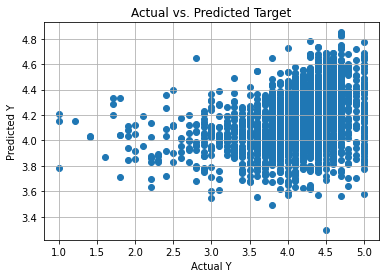

In [63]:
plt.scatter(y_test1, lin_y_pred1)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

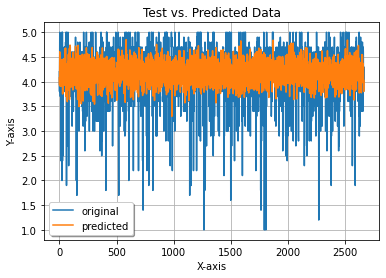

In [64]:
x_ax = range(len(y_test1))
plt.plot(x_ax, y_test1, label="original")
plt.plot(x_ax, lin_y_pred1, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [65]:
print("SGD Regression:Google play store data Prediction")
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train1, y_train1)
sgd_score = sgd_reg.score(x_train1, y_train1)
print("R-squared on Train:", sgd_score)

sgd_y_pred = sgd_reg.predict(x_test1)
sgd_accuracy = explained_variance_score(y_test1, sgd_y_pred1)
sgd_accuracy = round(sgd_accuracy*100, 6)
print("SGD Regressor Model Accuracy on Test:", sgd_accuracy, "%")
print()

sgd_mae = mean_absolute_error(y_test1, sgd_y_pred)
sgd_mse = mean_squared_error(y_test, sgd_y_pred)
sgd_rmse = sgd_mse*(1/2.0)

print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)
print()

SGD Regression:Google play store data Prediction
R-squared on Train: -4.102269405989349e+35
SGD Regressor Model Accuracy on Test: -2.1959302292763927e+37 %

MAE: 2.3940196670427005e+17
MSE: 1.1762296046780177e+35
RMSE: 5.881148023390088e+34



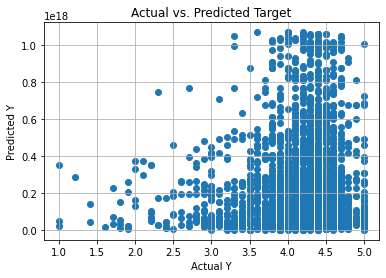

In [66]:
plt.scatter(y_test, sgd_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

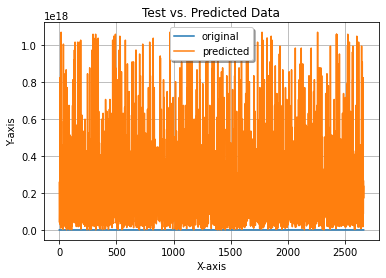

In [67]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, sgd_y_pred, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [68]:
model_table = pd.DataFrame(columns = ["Comparison Matrix", "LR Model", "SGD Model"])
model_table["Comparison Matrix"] = ["Accuracy (Variance Score)", "R2 Score", "MAE", "MSE", "RMSE"]
model_table["LR Model"] = [lin_accuracy, lin_score, lin_mae, lin_mse, lin_rmse]
model_table["SGD Model"] = [sgd_accuracy, sgd_score, sgd_mae, sgd_mse, sgd_rmse]

print(tabulate(model_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+----+---------------------------+------------+--------------+
|    | Comparison Matrix         | LR Model   | SGD Model    |
|----+---------------------------+------------+--------------|
| 0  | Accuracy (Variance Score) | 13.3208    | -2.19593e+37 |
| 1  | R2 Score                  | 0.165261   | -4.10227e+35 |
| 2  | MAE                       | 0.331595   | 2.39402e+17  |
| 3  | MSE                       | 0.238363   | 1.17623e+35  |
| 4  | RMSE                      | 0.119181   | 5.88115e+34  |
+----+---------------------------+------------+--------------+
